In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely.geometry
import seaborn as sns
import plotly.express as px
import re
from matplotlib.colors import TwoSlopeNorm
import missingno as msno
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import math

In [ ]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pd.set_option('display.max_columns', None)

In [ ]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200

In [ ]:
# Projected Coordinate System: how you project onto a 2D plane
epsg_2d = 26717 
# Toronto Police Service Open Data includes geographic location information provided in
# the projected coordinate system NAD 1927 UTM 17N
# https://epsg.io/26717

# Geographic Coordinate System: how coordinates are represented in a 3D space
# World Geodetic System 1984 (WGS84)
# https://epsg.io/4326
epsg_3d = 4326 

In [ ]:
stations_point = gpd.read_file('./clean_data/stations_point.geojson')
stations_area = gpd.read_file('./clean_data/stations_area.geojson')

# Import TRREB rental transactions

In [ ]:
rental = pd.read_csv("./clean_data/rental.csv")
rental

,district,All_Apartments_Listed,All_Apartments_Leased,Bachelor_Total_Leased,Bachelor_Avg_Lease_Rate,One_Bedroom_Total_Leased,One_Bedroom_Avg_Lease_Rate,Two_Bedroom_Total_Leased,Two_Bedroom_Avg_Lease_Rate,Three_Bedroom_Total_Leased,Three_Bedroom_Avg_Lease_Rate,Year,Quarter,YearQuarter,All_Apartments_Leased_vs_Listed,Bachelor_Total_Leased_Per_Room,Bachelor_Avg_Lease_Rate_Per_Room,One_Bedroom_Total_Leased_Per_Room,One_Bedroom_Avg_Lease_Rate_Per_Room,Two_Bedroom_Total_Leased_Per_Room,Two_Bedroom_Avg_Lease_Rate_Per_Room,Three_Bedroom_Total_Leased_Per_Room,Three_Bedroom_Avg_Lease_Rate_Per_Room
0,C01,2038.0,1194.0,59.0,1332.0,759.0,1666.0,370.0,2510.0,6.0,3194.0,2012,1,2012Q1,0.585868,59.0,1332.0,759.0,1666.0,740.0,1255.0,18.0,1064.666667
1,C01,2160.0,1350.0,78.0,1350.0,795.0,1739.0,453.0,2603.0,24.0,4321.0,2012,2,2012Q2,0.625000,78.0,1350.0,795.0,1739.0,906.0,1301.5,72.0,1440.333333
2,C01,2255.0,1408.0,50.0,1410.0,859.0,1802.0,476.0,2667.0,23.0,3891.0,2012,3,2012Q3,0.624390,50.0,1410.0,859.0,1802.0,952.0,1333.5,69.0,1297.000000
3,C01,1917.0,1012.0,37.0,1426.0,647.0,1844.0,319.0,2650.0,9.0,3717.0,2012,4,2012Q4,0.527908,37.0,1426.0,647.0,1844.0,638.0,1325.0,27.0,1239.000000
4,C01,2845.0,1350.0,62.0,1338.0,868.0,1758.0,404.0,2578.0,16.0,4719.0,2013,1,2013Q1,0.474517,62.0,1338.0,868.0,1758.0,808.0,1289.0,48.0,1573.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,W10,92.0,34.0,NaN,NaN,11.0,1850.0,20.0,2075.0,3.0,2300.0,2020,4,2020Q4,0.369565,NaN,NaN,11.0,1850.0,40.0,1037.5,9.0,766.666667
1396,W10,85.0,36.0,NaN,NaN,21.0,1764.0,13.0,2123.0,2.0,2225.0,2021,1,2021Q1,0.423529,NaN,NaN,21.0,1764.0,26.0,1061.5,6.0,741.666667
1397,W10,78.0,35.0,NaN,NaN,21.0,1748.0,14.0,2243.0,NaN,NaN,2021,2,2021Q2,0.448718,NaN,NaN,21.0,1748.0,28.0,1121.5,NaN,NaN
1398,W10,83.0,31.0,NaN,NaN,15.0,1839.0,15.0,2150.0,1.0,2350.0,2021,3,2021Q3,0.373494,NaN,NaN,15.0,1839.0,30.0,1075.0,3.0,783.333333


In [ ]:
neighborhoods_rental = gpd.read_file('./clean_data/neighbourhoods_rental.geojson')
neighborhoods_rental

,Neighbourhood,Hood_ID,district,All_Apartments_Listed,All_Apartments_Leased,Year,Quarter,YearQuarter,All_Apartments_Leased_vs_Listed,One_Bedroom_Total_Leased_Per_Room,One_Bedroom_Avg_Lease_Rate_Per_Room,Two_Bedroom_Total_Leased_Per_Room,Two_Bedroom_Avg_Lease_Rate_Per_Room,Three_Bedroom_Total_Leased_Per_Room,Three_Bedroom_Avg_Lease_Rate_Per_Room,All_Apartments_Total_Leased_Per_Room,All_Apartments_Avg_Lease_Rate_Per_Room,geometry
0,Yonge-St.Clair,97,C02,179.0,92.0,2012,1,2012Q1,0.513966,45.0,2029.0,84.0,2052.0,3.0,1333.333333,132.0,2027.825758,"POLYGON ((-79.39115 43.68108, -79.39137 43.680..."
1,Yonge-St.Clair,97,C02,214.0,105.0,2012,2,2012Q2,0.490654,50.0,1939.0,90.0,1959.0,12.0,1991.666667,152.0,1955.000000,"POLYGON ((-79.39115 43.68108, -79.39137 43.680..."
2,Yonge-St.Clair,97,C02,234.0,107.0,2012,3,2012Q3,0.457265,57.0,2100.0,82.0,2009.5,12.0,2299.333333,151.0,2066.695364,"POLYGON ((-79.39115 43.68108, -79.39137 43.680..."
3,Yonge-St.Clair,97,C02,226.0,82.0,2012,4,2012Q4,0.362832,46.0,2115.0,58.0,1698.5,9.0,1466.666667,113.0,1849.584071,"POLYGON ((-79.39115 43.68108, -79.39137 43.680..."
4,Yonge-St.Clair,97,C02,273.0,95.0,2013,1,2013Q1,0.347985,41.0,2351.0,94.0,2123.5,9.0,1850.000000,144.0,2171.180556,"POLYGON ((-79.39115 43.68108, -79.39137 43.680..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,Mount Pleasant West,104,C10,1038.0,404.0,2020,4,2020Q4,0.389210,267.0,1828.0,242.0,1321.5,3.0,2000.000000,512.0,1589.607422,"POLYGON ((-79.39607 43.69566, -79.39616 43.696..."
5596,Mount Pleasant West,104,C10,970.0,416.0,2021,1,2021Q1,0.428866,281.0,1779.0,230.0,1278.0,12.0,1166.666667,523.0,1544.625239,"POLYGON ((-79.39607 43.69566, -79.39616 43.696..."
5597,Mount Pleasant West,104,C10,1064.0,608.0,2021,2,2021Q2,0.571429,409.0,1789.0,348.0,1270.0,12.0,1391.666667,769.0,1547.933680,"POLYGON ((-79.39607 43.69566, -79.39616 43.696..."
5598,Mount Pleasant West,104,C10,1031.0,767.0,2021,3,2021Q3,0.743938,501.0,1896.0,444.0,1334.5,12.0,1366.666667,957.0,1628.854754,"POLYGON ((-79.39607 43.69566, -79.39616 43.696..."


In [ ]:
neighborhoods_rental.isna().sum()

Neighbourhood                             0
Hood_ID                                   0
district                                  0
All_Apartments_Listed                     0
All_Apartments_Leased                     0
Year                                      0
Quarter                                   0
YearQuarter                               0
All_Apartments_Leased_vs_Listed           0
One_Bedroom_Total_Leased_Per_Room         0
One_Bedroom_Avg_Lease_Rate_Per_Room       0
Two_Bedroom_Total_Leased_Per_Room         0
Two_Bedroom_Avg_Lease_Rate_Per_Room       0
Three_Bedroom_Total_Leased_Per_Room       0
Three_Bedroom_Avg_Lease_Rate_Per_Room     0
All_Apartments_Total_Leased_Per_Room      0
All_Apartments_Avg_Lease_Rate_Per_Room    0
geometry                                  0
dtype: int64

In [ ]:
rental_years = neighborhoods_rental.Year.unique()
rental_quarters = neighborhoods_rental.Quarter.unique()

In [ ]:
def plot_rental(var, title):
    fig, axes = plt.subplots(len(rental_quarters), len(rental_years))
    
    for j in range(axes.shape[1]):
        
        # due to inflation, rental rates in recent years must be higher than those in previous years
        # therefore, it would only make sense to fix the range for the colorbar 
        # such that we compare across quarters to observe seasonal effect (if any) in each year, but not across years
        # selected_period = neighborhoods_rental.loc[(neighborhoods_rental['Year'] == rental_years[j])]
        # vmin, vmax = selected_period[var].min(), selected_period[var].max()
        # norm = TwoSlopeNorm(vmin=vmin, vcenter= np.mean([vmin, vmax]), vmax=vmax)    
        
        for i in range(axes.shape[0]):         
            plot_df = neighborhoods_rental.loc[(neighborhoods_rental['Quarter'] == rental_quarters[i]) & (neighborhoods_rental['Year'] == rental_years[j])]
            plot_df.plot(column = var, 
                         cmap = 'bwr', 
                        #  norm = norm, 
                         ax = axes[i, j])
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].set_yticks([])
            if i == 0:
                axes[i,j].set_title(rental_years[j])
            if j == 0:
                axes[i,j].set_ylabel("Q" + str(rental_quarters[i]), rotation=90, size='large')

    fig.suptitle(title, size='xx-large')

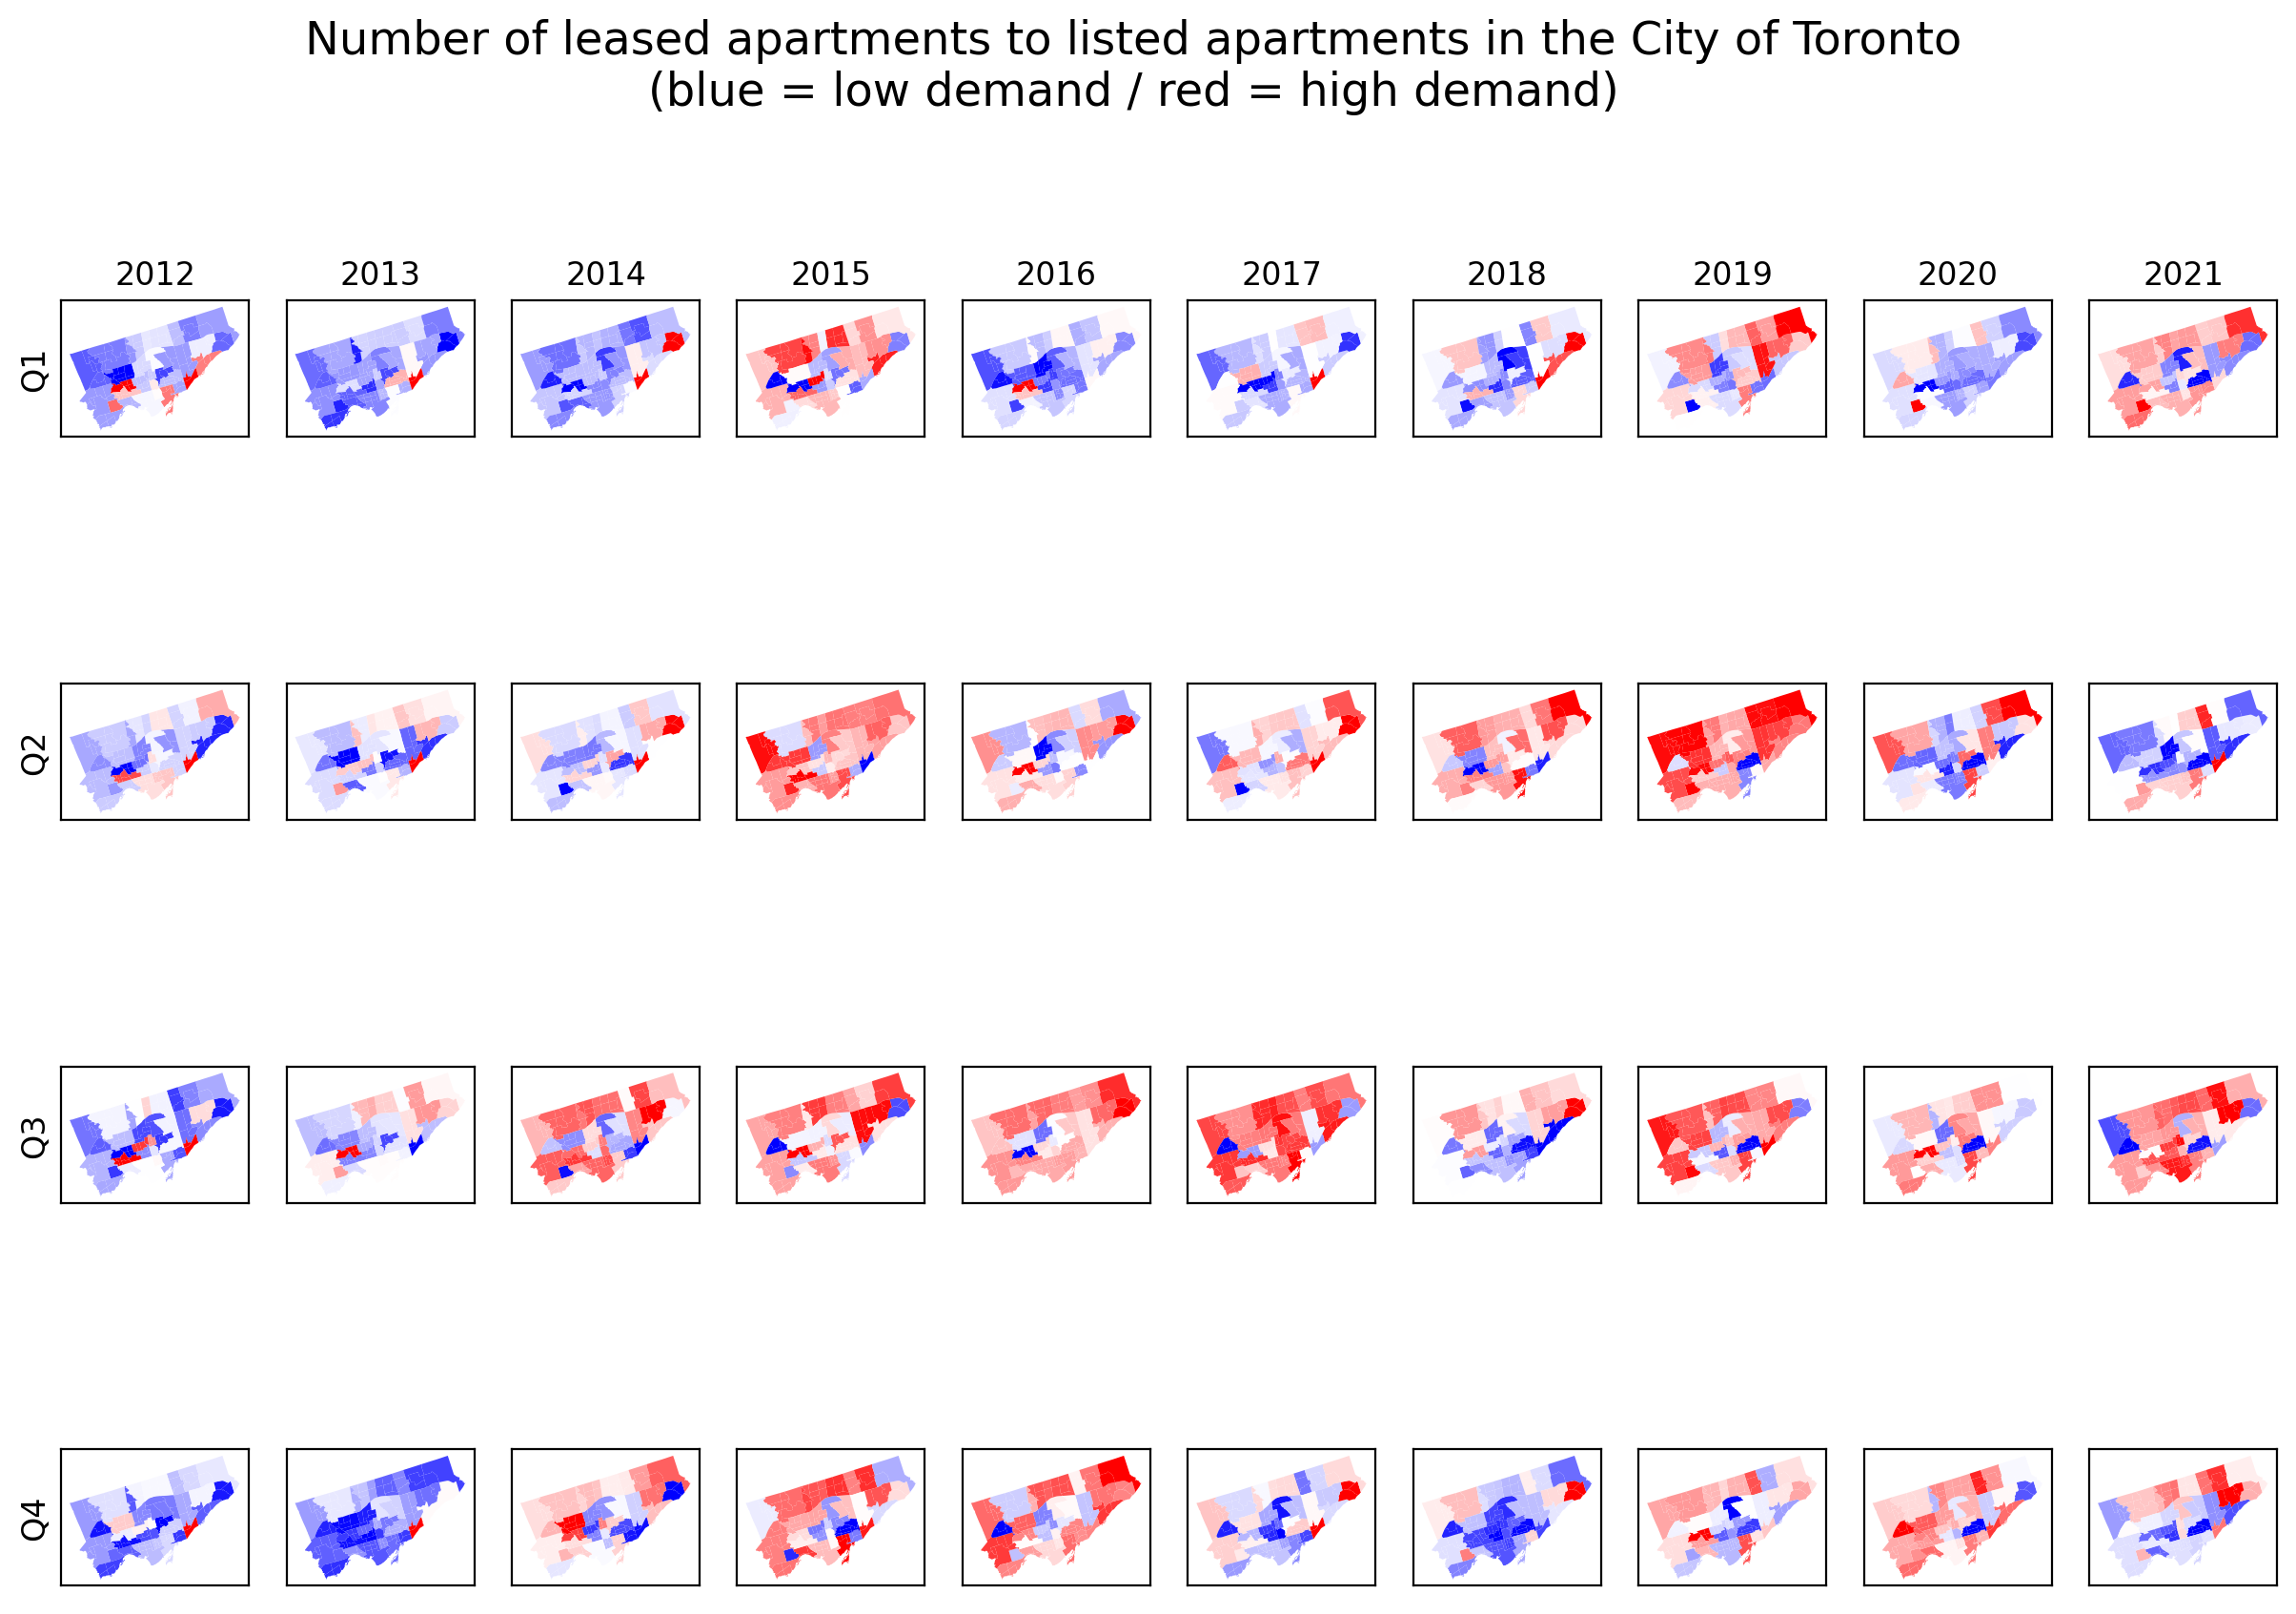

In [ ]:
plot_rental('All_Apartments_Leased_vs_Listed', 
            'Number of leased apartments to listed apartments in the City of Toronto\n(blue = low demand / red = high demand)')

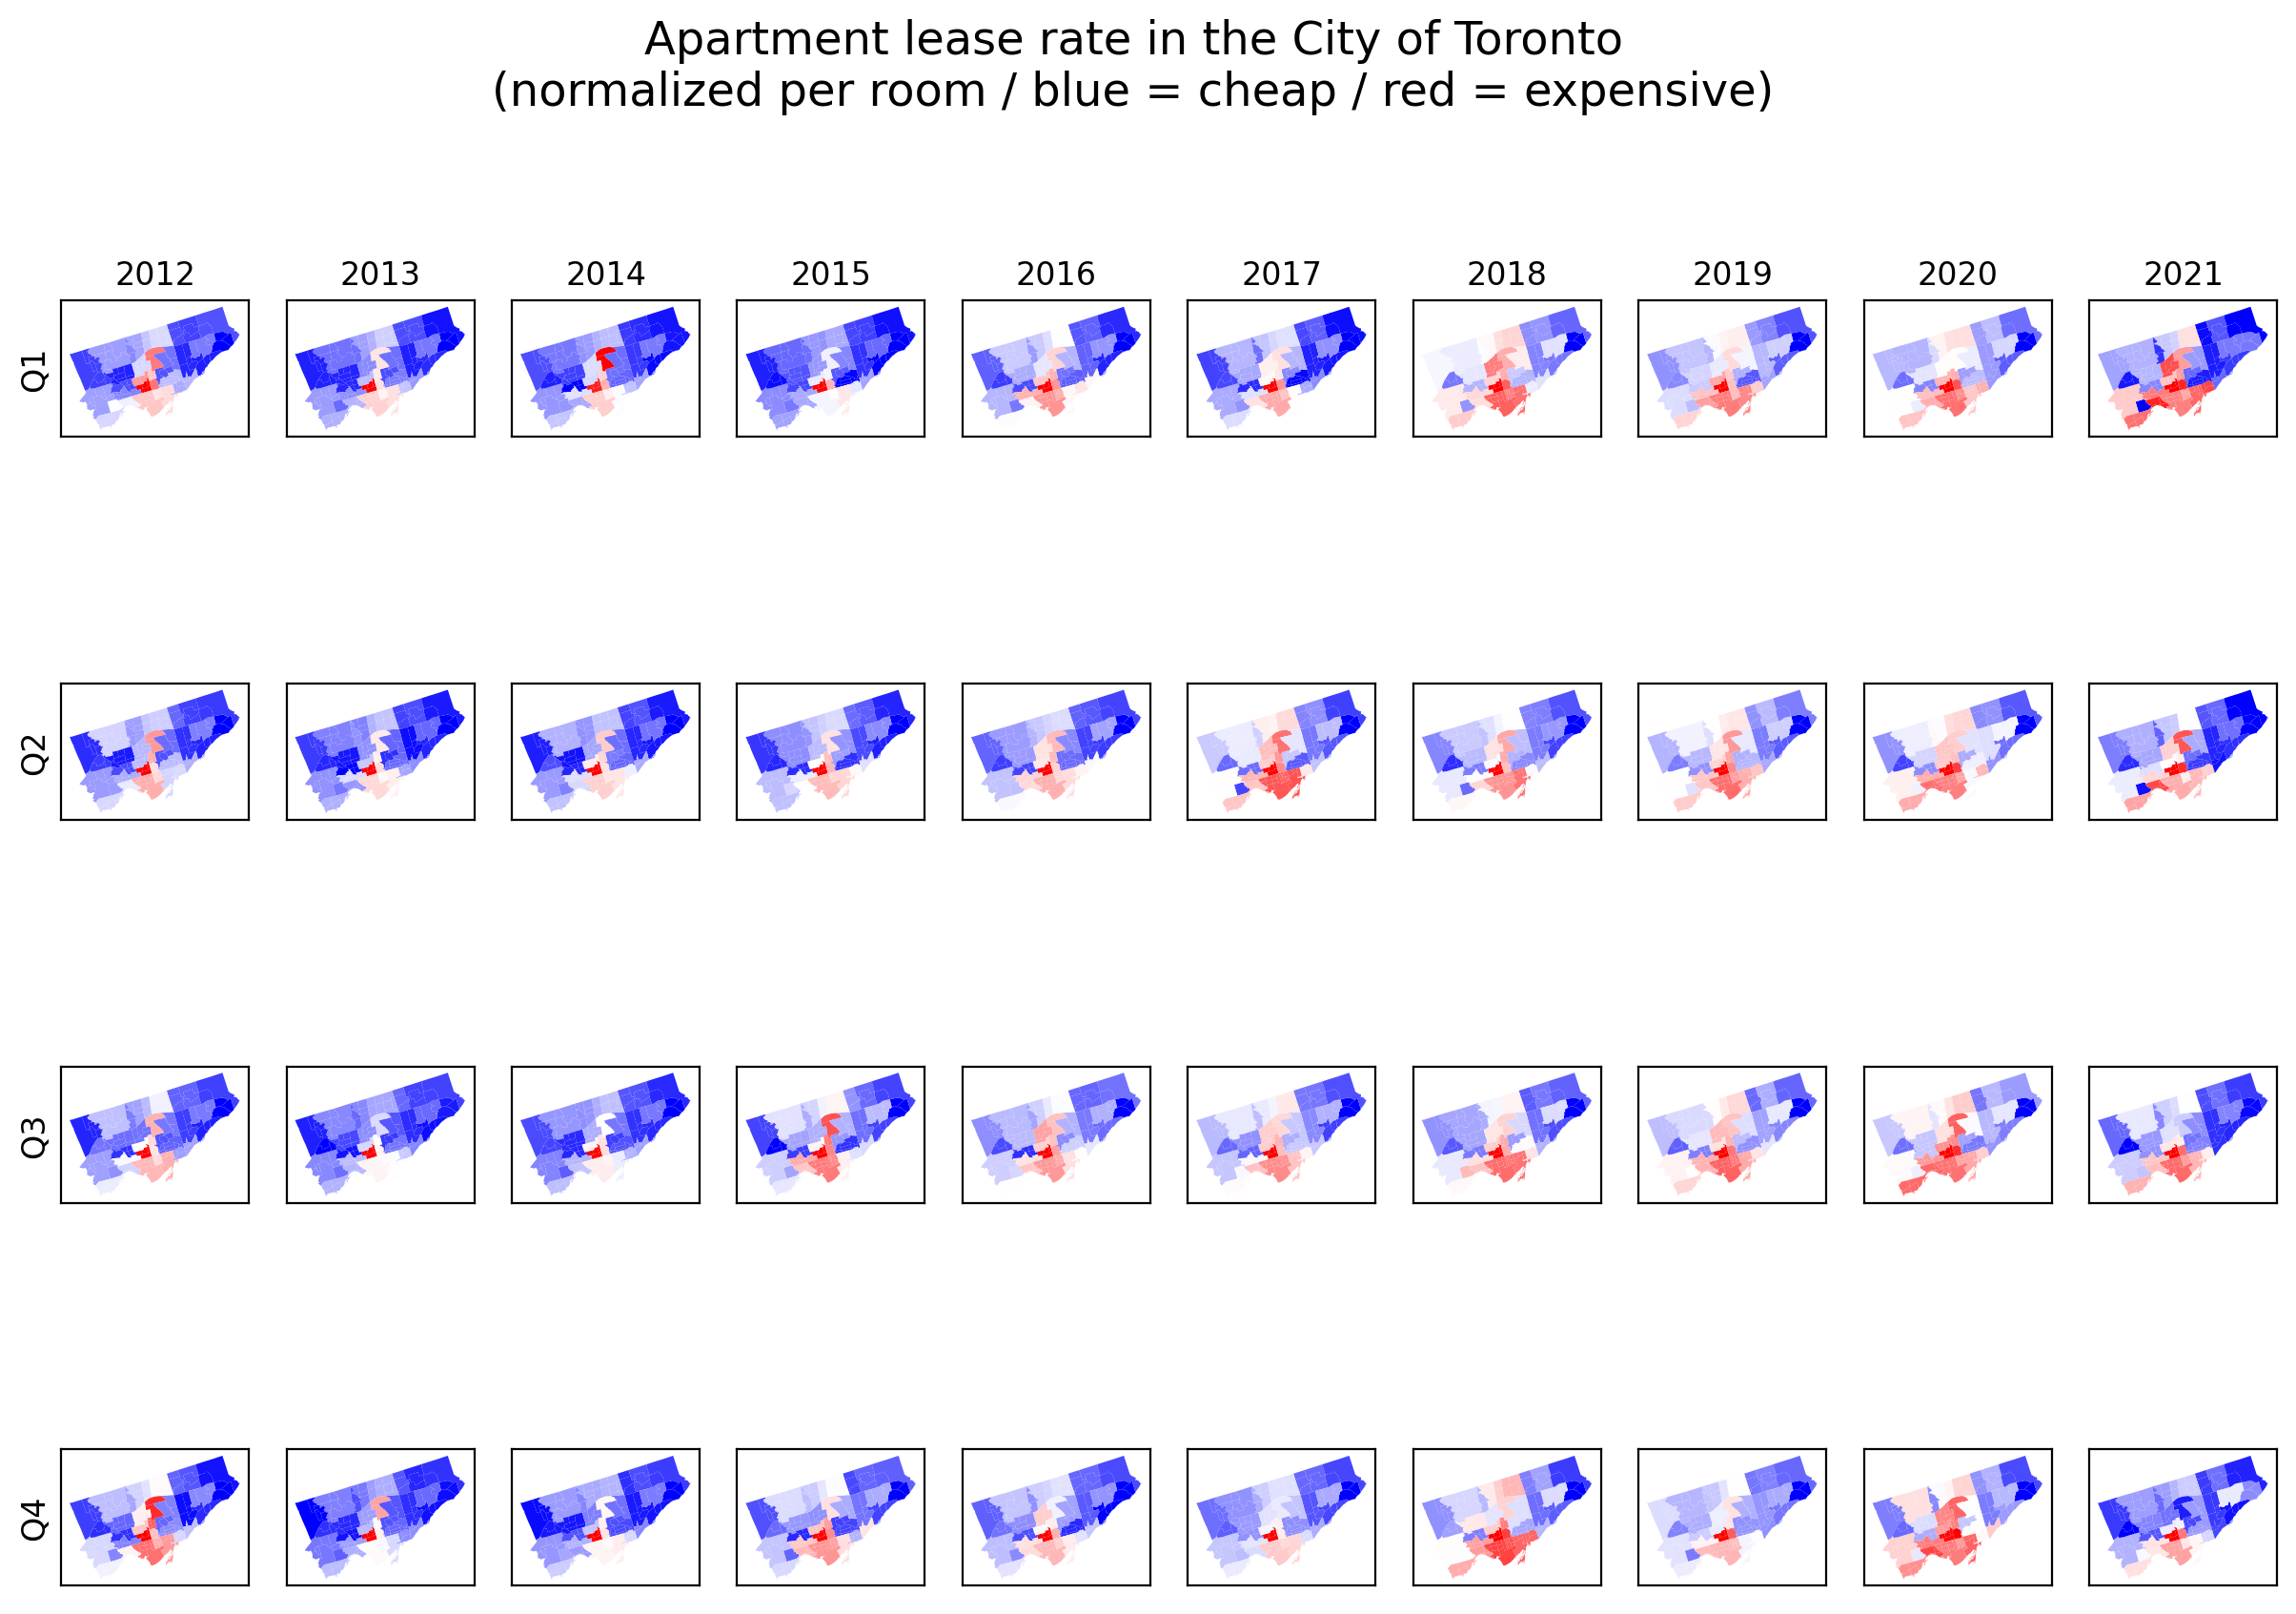

In [ ]:
plot_rental('All_Apartments_Avg_Lease_Rate_Per_Room', 'Apartment lease rate in the City of Toronto\n(normalized per room / blue = cheap / red = expensive)')

In [ ]:
neighborhoods_rental.columns

Index(['Neighbourhood', 'Hood_ID', 'district', 'All_Apartments_Listed',
       'All_Apartments_Leased', 'Year', 'Quarter', 'YearQuarter',
       'All_Apartments_Leased_vs_Listed', 'One_Bedroom_Total_Leased_Per_Room',
       'One_Bedroom_Avg_Lease_Rate_Per_Room',
       'Two_Bedroom_Total_Leased_Per_Room',
       'Two_Bedroom_Avg_Lease_Rate_Per_Room',
       'Three_Bedroom_Total_Leased_Per_Room',
       'Three_Bedroom_Avg_Lease_Rate_Per_Room',
       'All_Apartments_Total_Leased_Per_Room',
       'All_Apartments_Avg_Lease_Rate_Per_Room', 'geometry'],
      dtype='object')

Text(0.5, 1.0, 'Recovery in rental demand: ratio of leased to listed apartments has picked up in 2021')

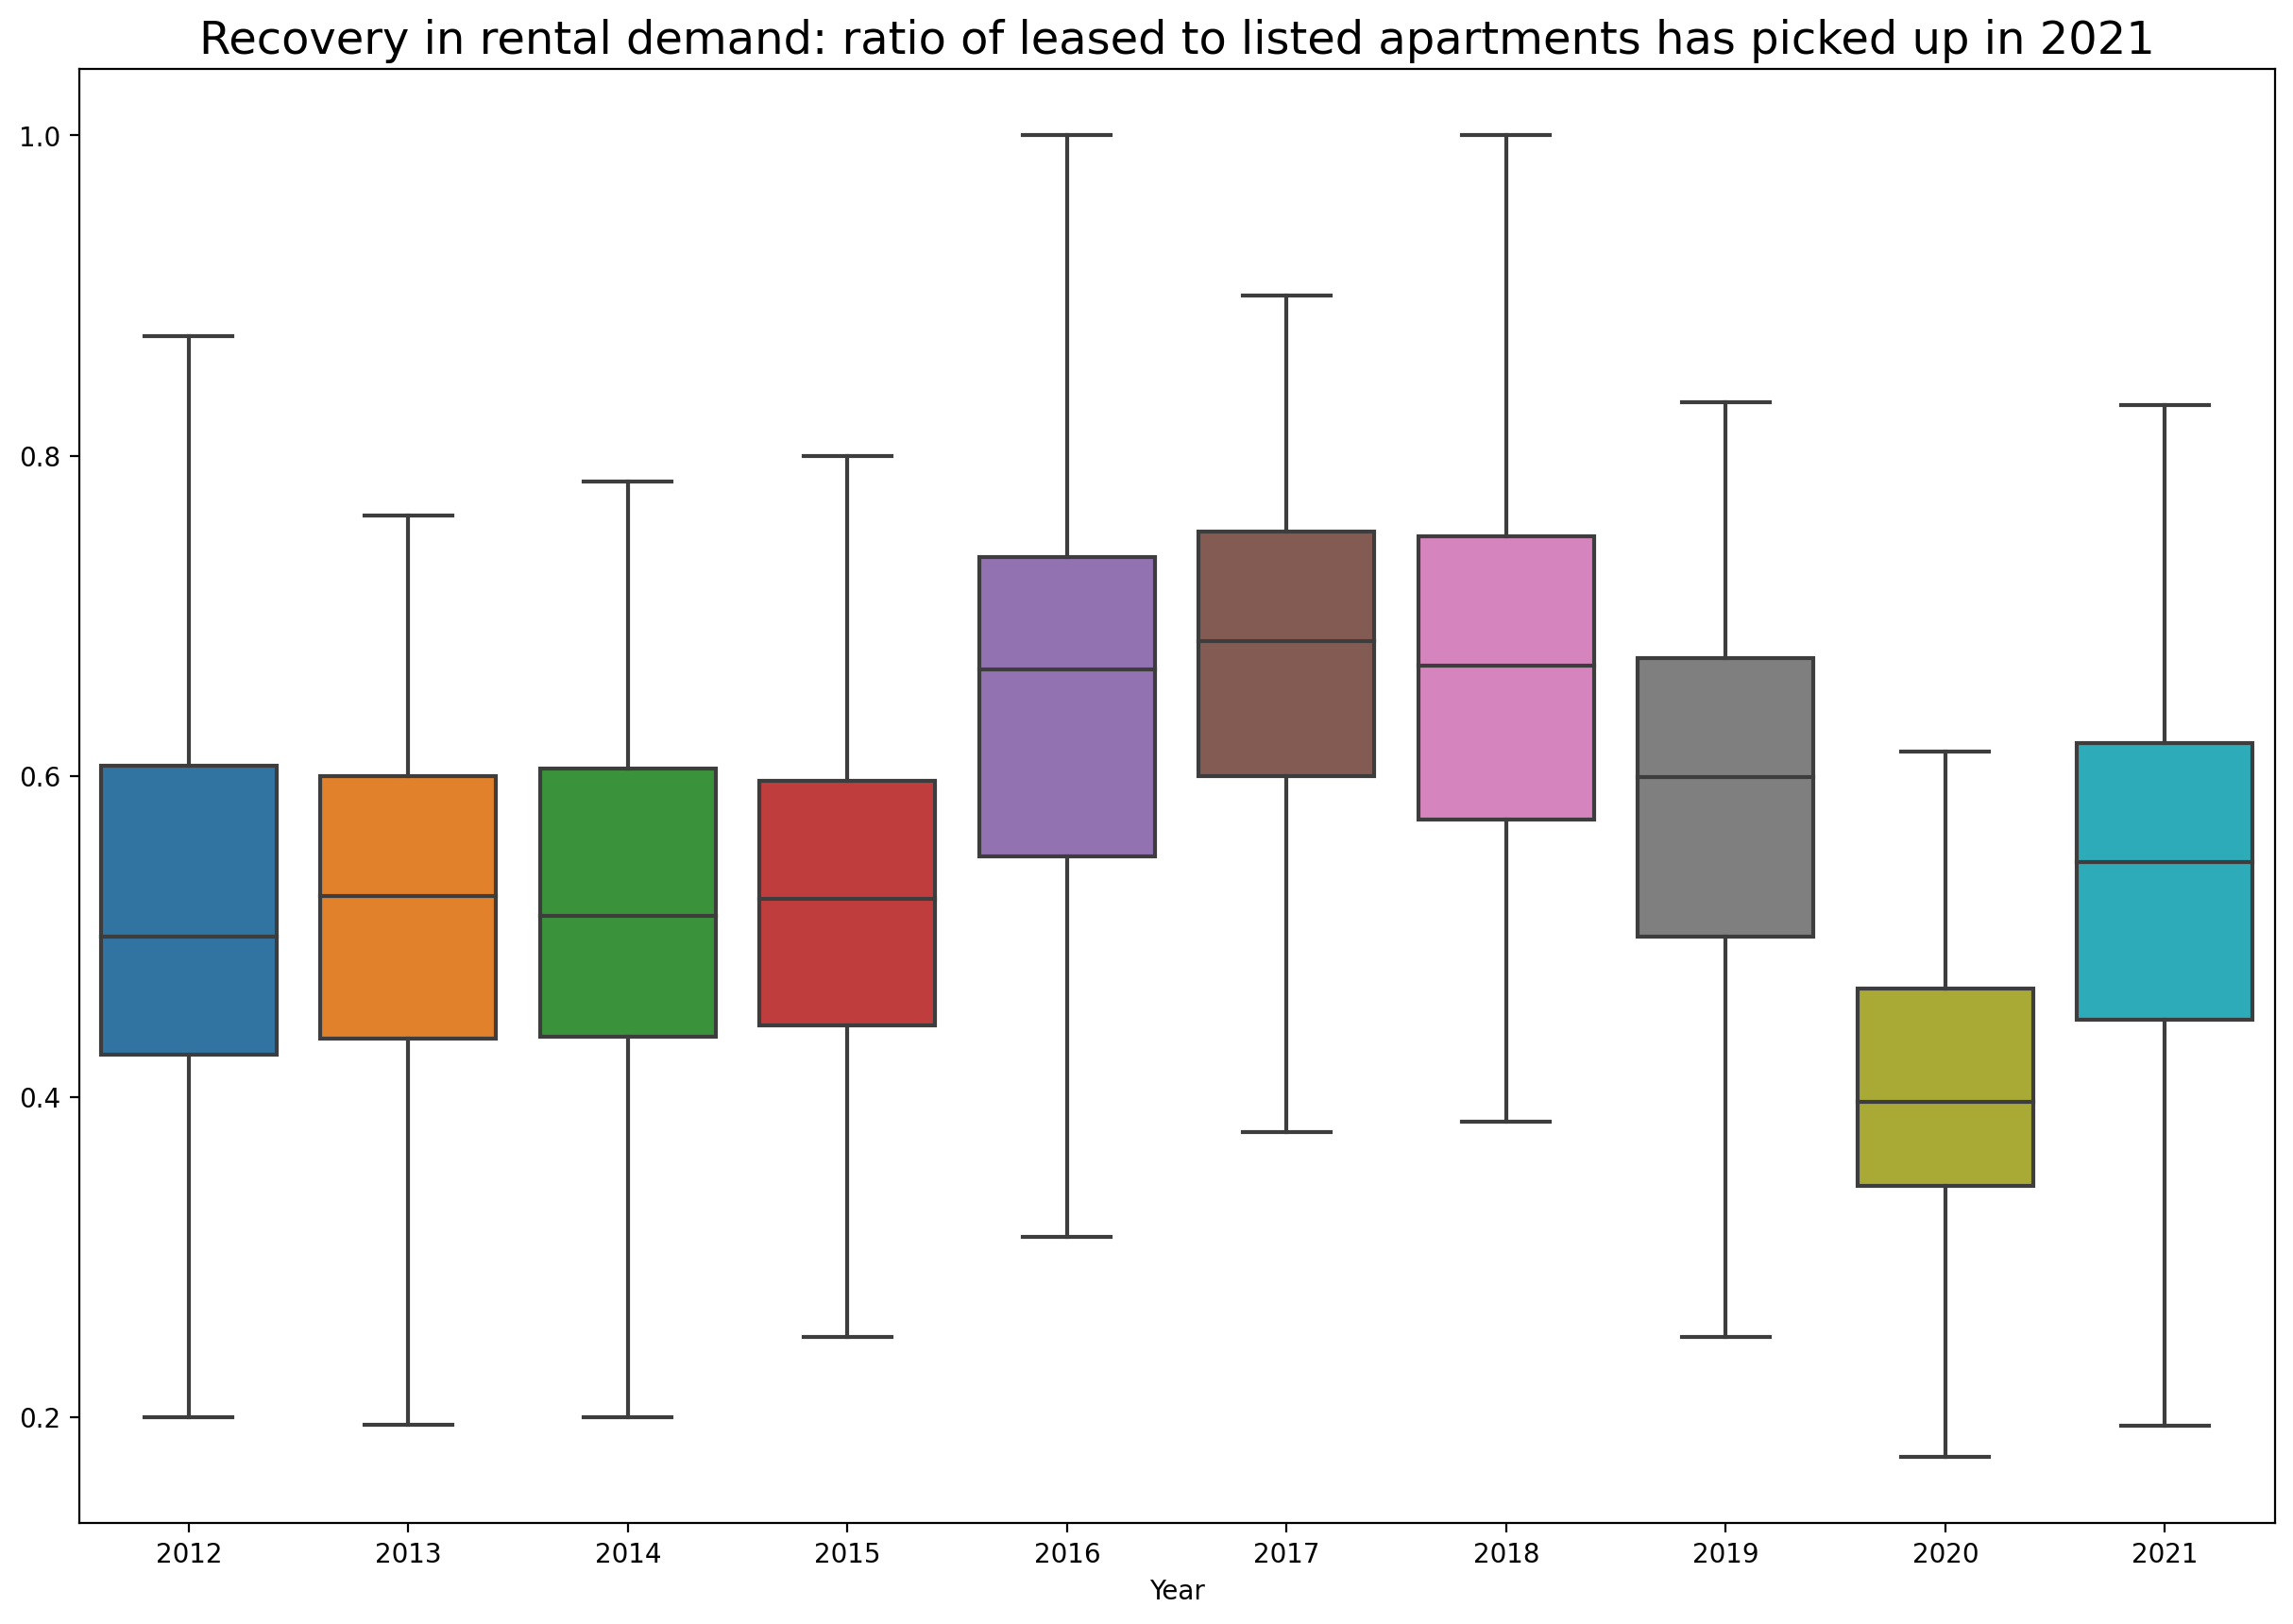

In [ ]:
var = 'All_Apartments_Leased_vs_Listed'
title = 'Recovery in rental demand: ratio of leased to listed apartments has picked up in 2021'

ax = sns.boxplot(x='Year', y=var,data=neighborhoods_rental, 
            showfliers = False, # remove outliers
            )
ax.set_ylabel('')
ax.set_title(title, size='xx-large')

Text(0.5, 1.1, 'Lease rates for apartments have tapered off since the spike in 2019\n(normalized by number of rooms)')

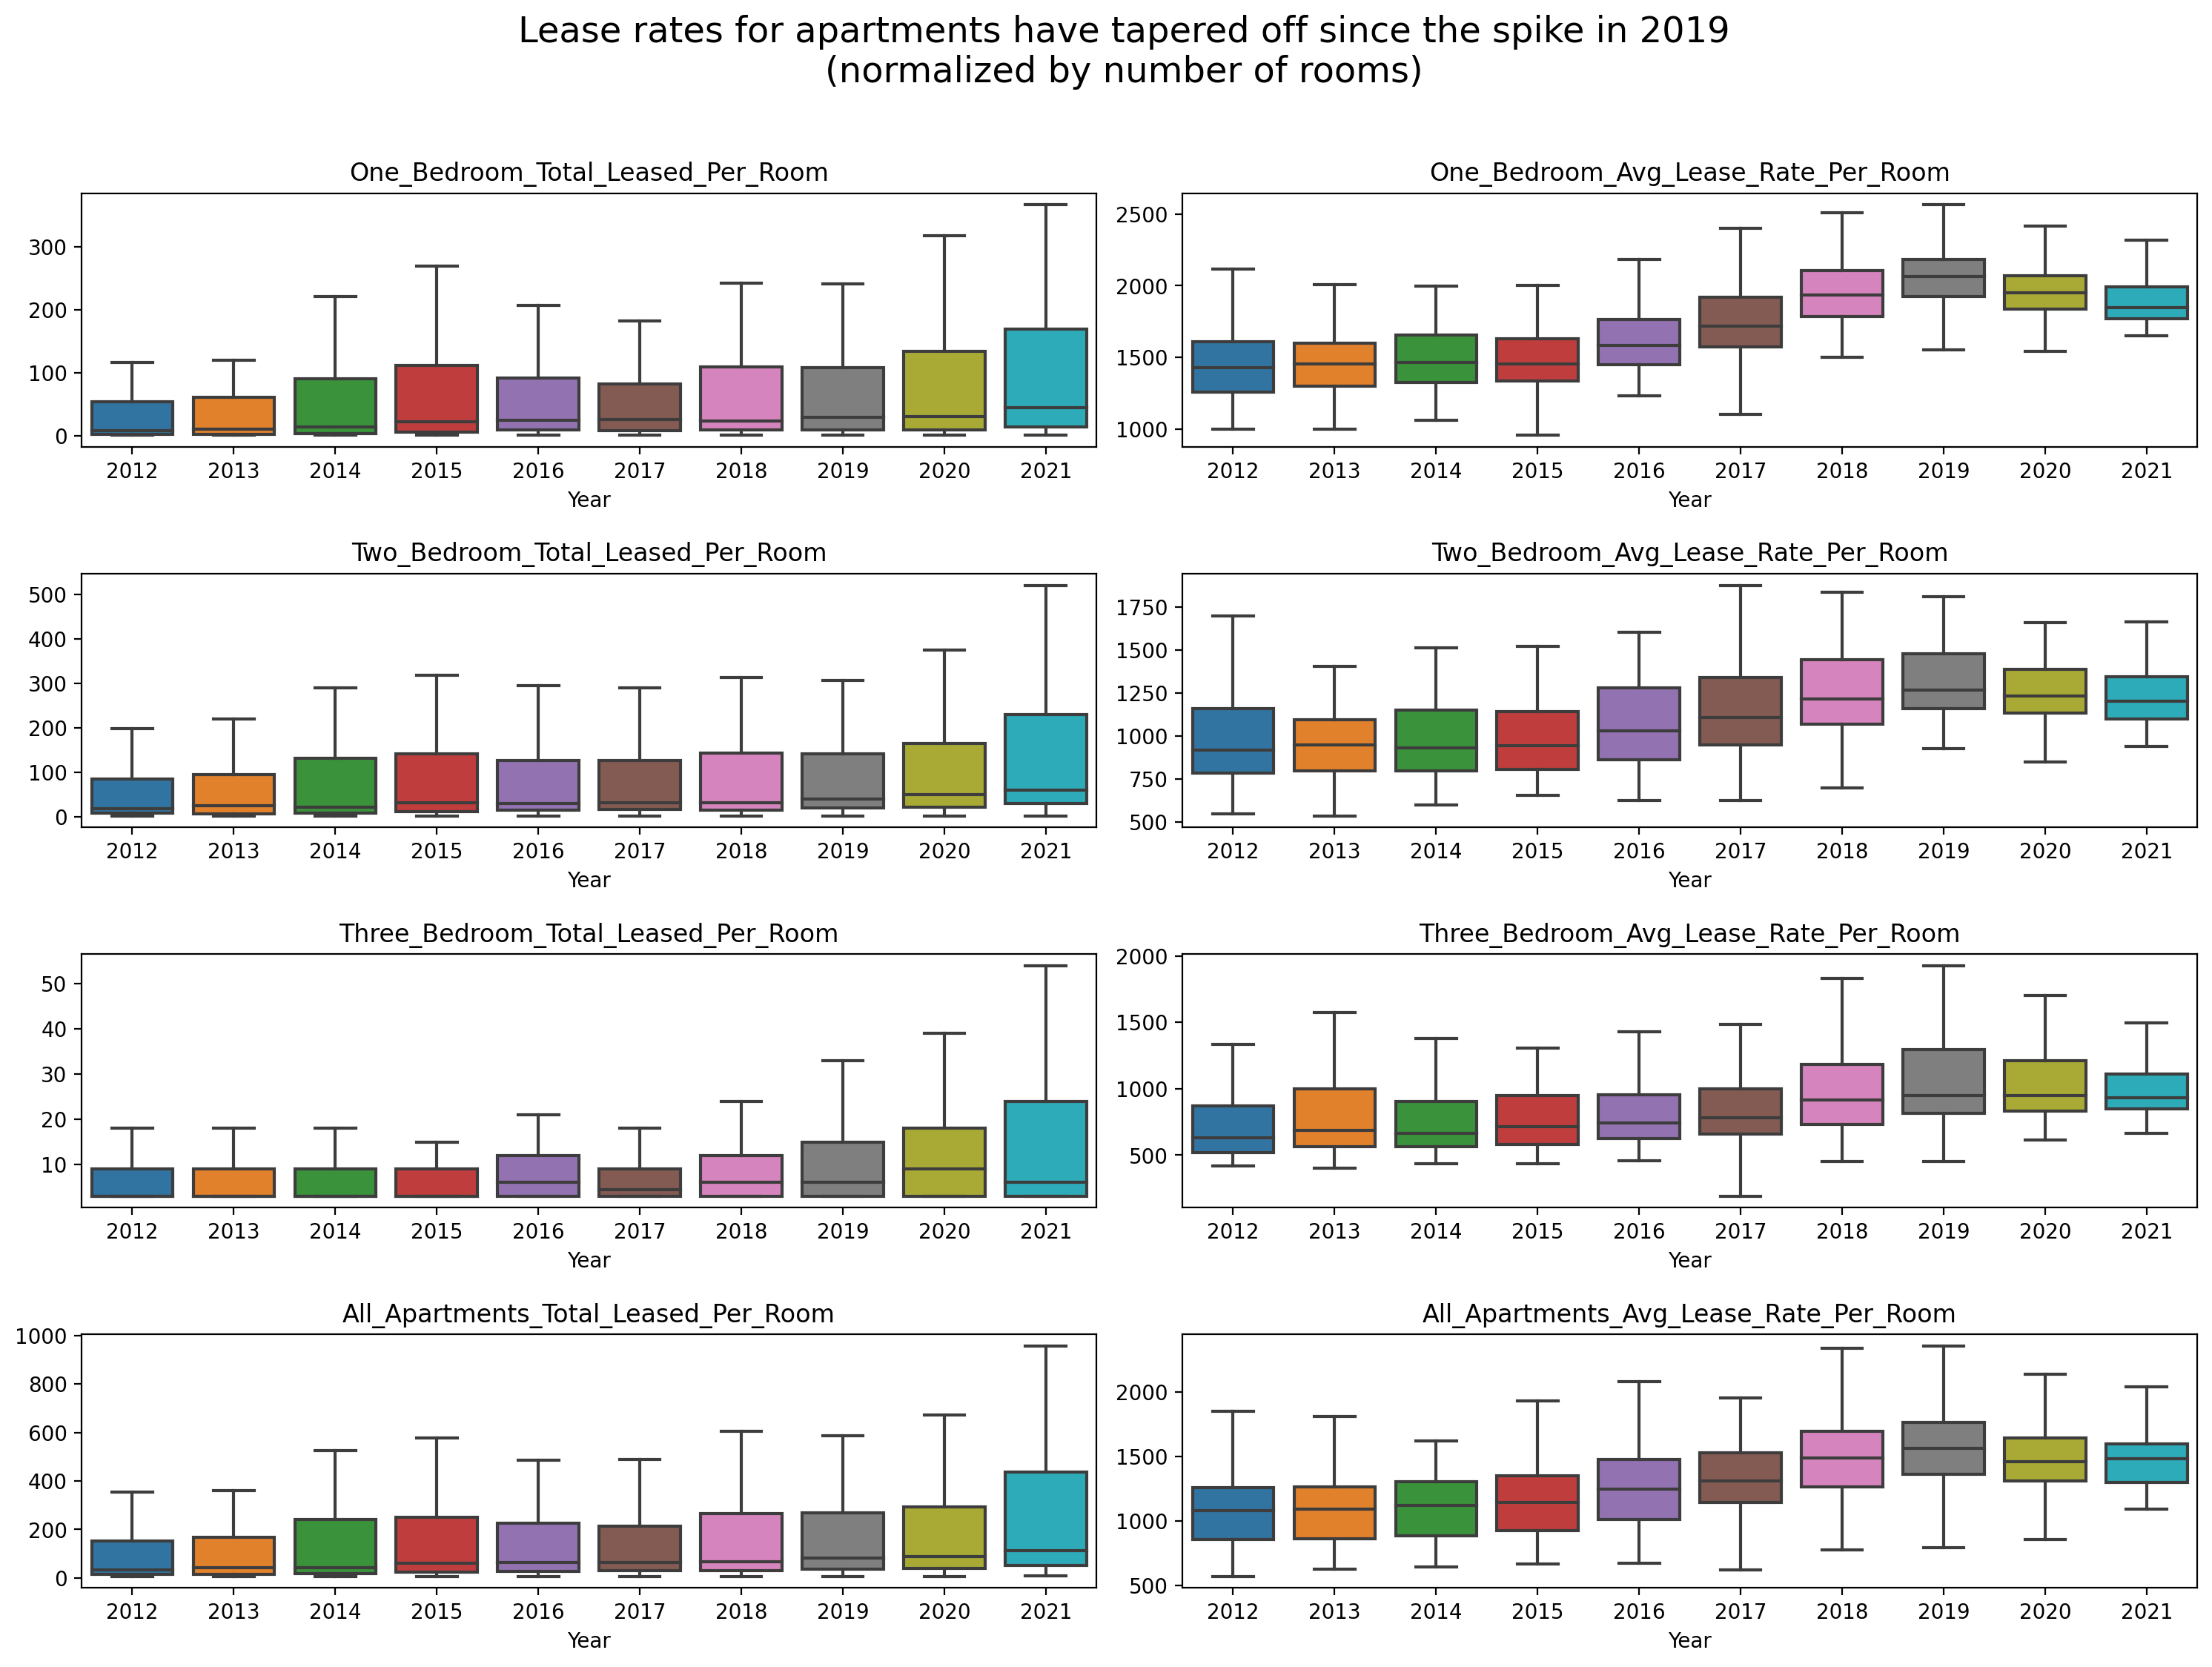

In [ ]:
vars = ['One_Bedroom_Total_Leased_Per_Room',
       'One_Bedroom_Avg_Lease_Rate_Per_Room',
       'Two_Bedroom_Total_Leased_Per_Room',
       'Two_Bedroom_Avg_Lease_Rate_Per_Room',
       'Three_Bedroom_Total_Leased_Per_Room',
       'Three_Bedroom_Avg_Lease_Rate_Per_Room',
       'All_Apartments_Total_Leased_Per_Room',
       'All_Apartments_Avg_Lease_Rate_Per_Room']

fig, axes = plt.subplots(int(len(vars)/2),2)
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
for var, ax in zip(vars, axes.flatten()):
    sns.boxplot(x='Year', y=var,data=neighborhoods_rental, 
                showfliers = False, # remove outliers
                ax=ax)
    ax.set_ylabel('')
    ax.set_title(var)
    
fig.suptitle('Lease rates for apartments have tapered off since the spike in 2019\n(normalized by number of rooms)', 
             size='xx-large', y = 1.1)

Text(0.5, 1.1, 'Quarterly effect: lease rates are stable throughout the year despite strong demand in Q3 due to school season\n(normalized by number of rooms)')

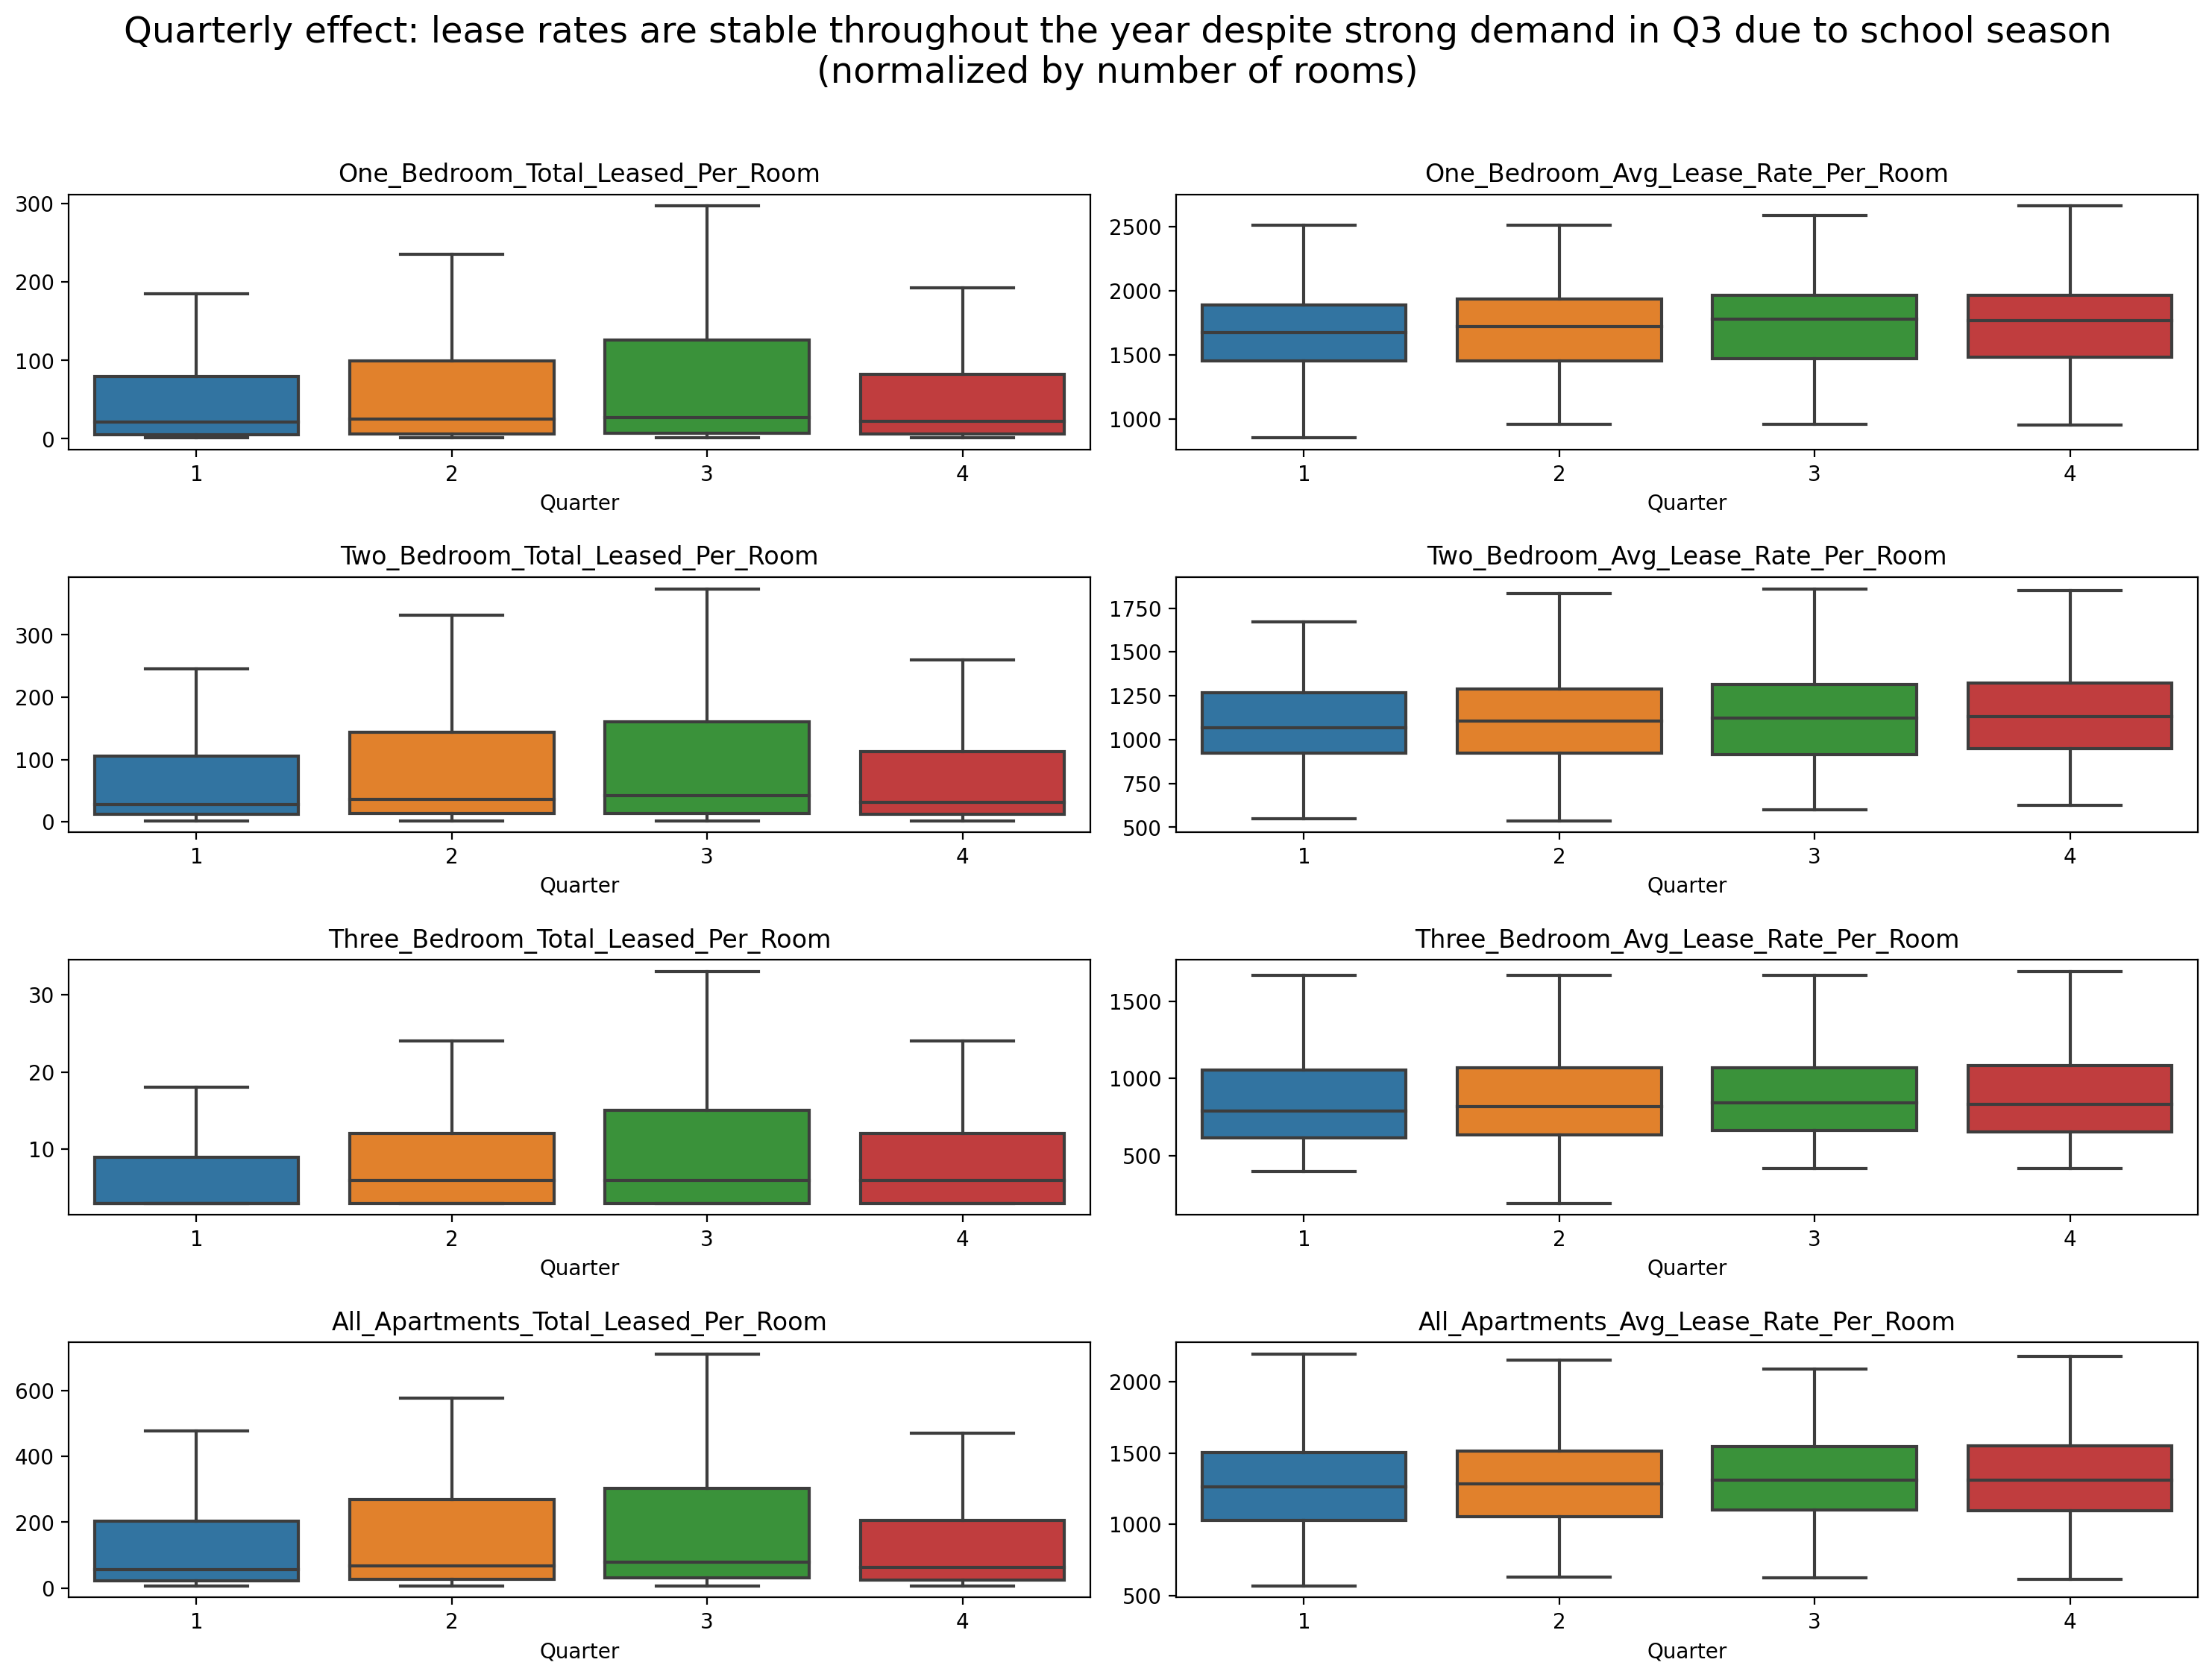

In [ ]:
vars = ['One_Bedroom_Total_Leased_Per_Room',
       'One_Bedroom_Avg_Lease_Rate_Per_Room',
       'Two_Bedroom_Total_Leased_Per_Room',
       'Two_Bedroom_Avg_Lease_Rate_Per_Room',
       'Three_Bedroom_Total_Leased_Per_Room',
       'Three_Bedroom_Avg_Lease_Rate_Per_Room',
       'All_Apartments_Total_Leased_Per_Room',
       'All_Apartments_Avg_Lease_Rate_Per_Room']

fig, axes = plt.subplots(int(len(vars)/2),2)
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
for var, ax in zip(vars, axes.flatten()):
    sns.boxplot(x='Quarter', y=var,data=neighborhoods_rental, 
                showfliers = False, # remove outliers
                ax=ax)
    ax.set_ylabel('')
    ax.set_title(var) 
    
fig.suptitle('Quarterly effect: lease rates are stable throughout the year despite strong demand in Q3 due to school season\n(normalized by number of rooms)', 
             size='xx-large', y = 1.1)

Top 5 most expensive MLS districts: 
 district
C02    2367.0
C09    1922.5
C01    1594.5
W01    1548.0
C08    1478.0
Name: Two_Bedroom_Avg_Lease_Rate_Per_Room, dtype: float64


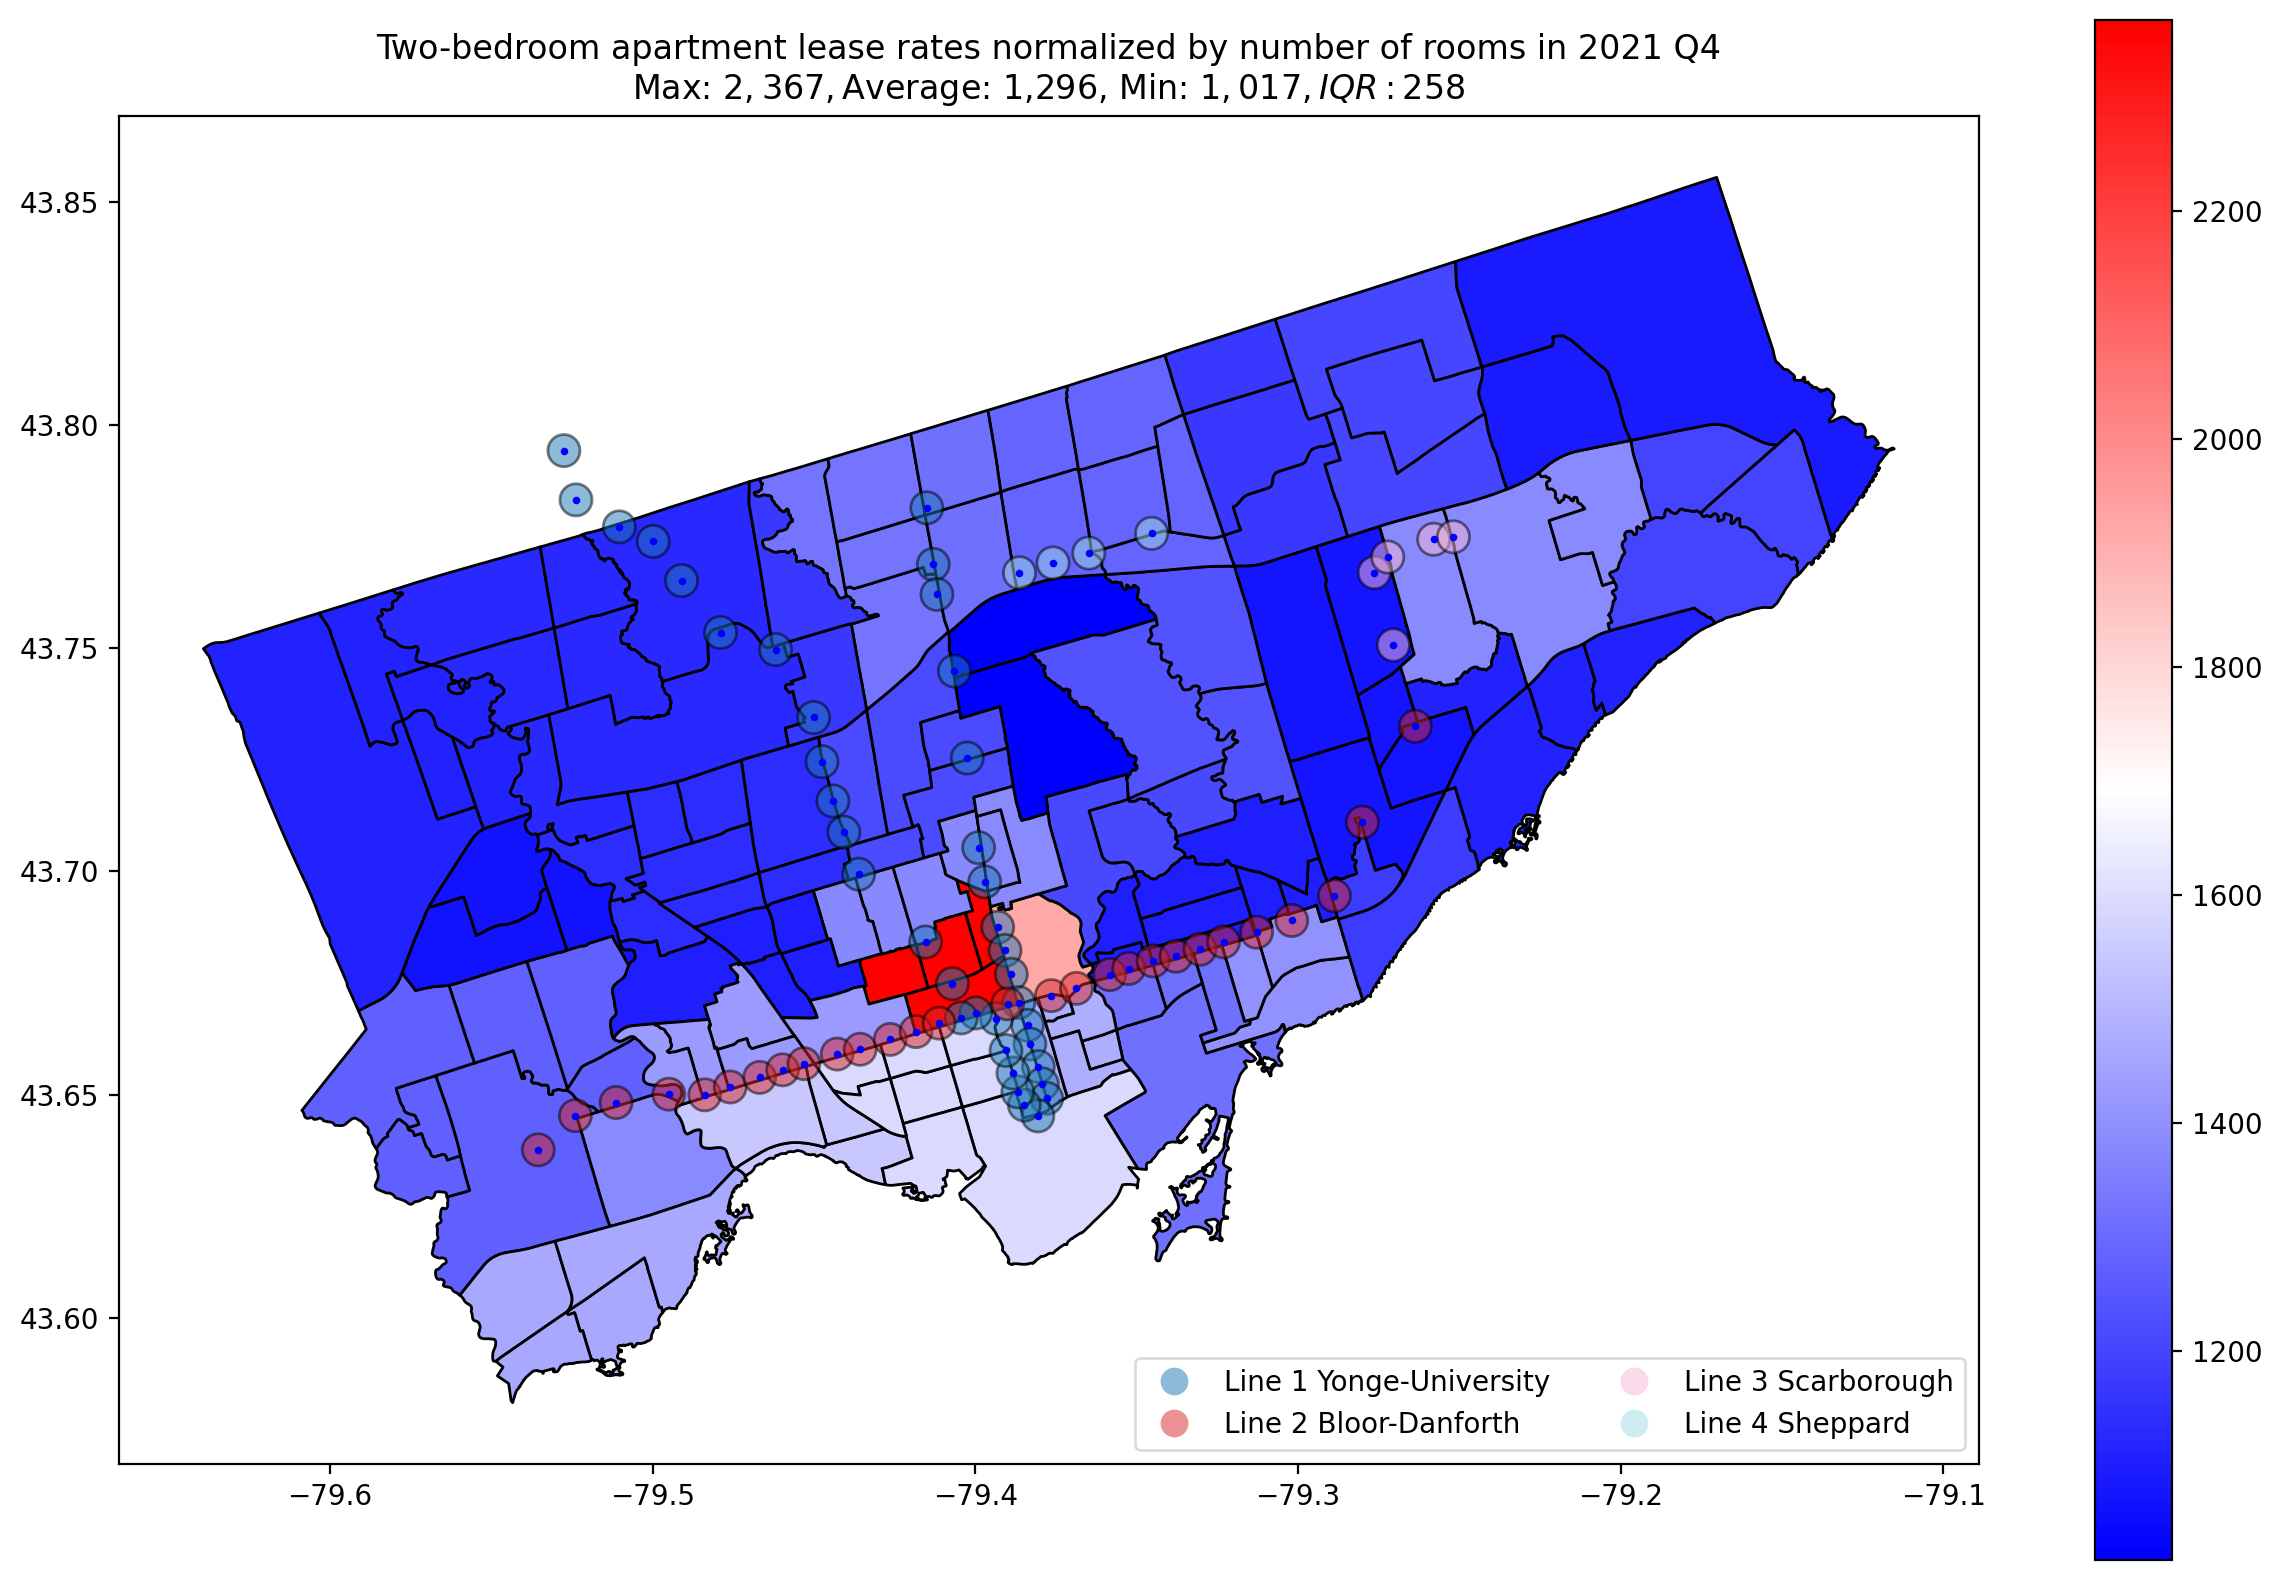

In [ ]:
selected_year = 2021
selected_quarter = 4
var = 'Two_Bedroom_Avg_Lease_Rate_Per_Room'
selected_period = neighborhoods_rental.loc[(neighborhoods_rental['Year'] == selected_year) & (neighborhoods_rental['Quarter'] == selected_quarter)]


ax = selected_period.plot(column = var,
                     legend = True,
                     edgecolor = 'black',
                     cmap = "bwr",
                     )

# annotate MLS districts
# for geometry, label in zip(selected_period.geometry, selected_period.district):
#     ax.annotate(label, xy=(geometry.centroid.x, geometry.centroid.y), ha='center')
    
stations_area.plot(column = 'line', 
                edgecolor = 'black', 
                alpha = 0.5,
                cmap = 'tab20',
                legend = True,
                legend_kwds = {'loc': 'lower right', 
                                'ncol': 2,
                                'edgecolor': 'lightgrey'},
                ax = ax)
stations_point.plot(ax=ax, 
                    color = 'blue', 
                    markersize = 3)

    
ax.set_title(f"Two-bedroom apartment lease rates normalized by number of rooms in {selected_year} Q{selected_quarter}\nMax: ${selected_period[var].max():,.0f}, $Average: {selected_period[var].mean():,.0f}, Min: ${selected_period[var].min():,.0f}, IQR: ${selected_period[var].quantile(0.75) - selected_period[var].quantile(0.25):,.0f}")

print("Top 5 most expensive MLS districts: \n",neighborhoods_rental.loc[(neighborhoods_rental['Year'] == selected_year) & (neighborhoods_rental['Quarter'] == selected_quarter)].groupby('district')[var].mean().sort_values(ascending=False).head())

<AxesSubplot:>

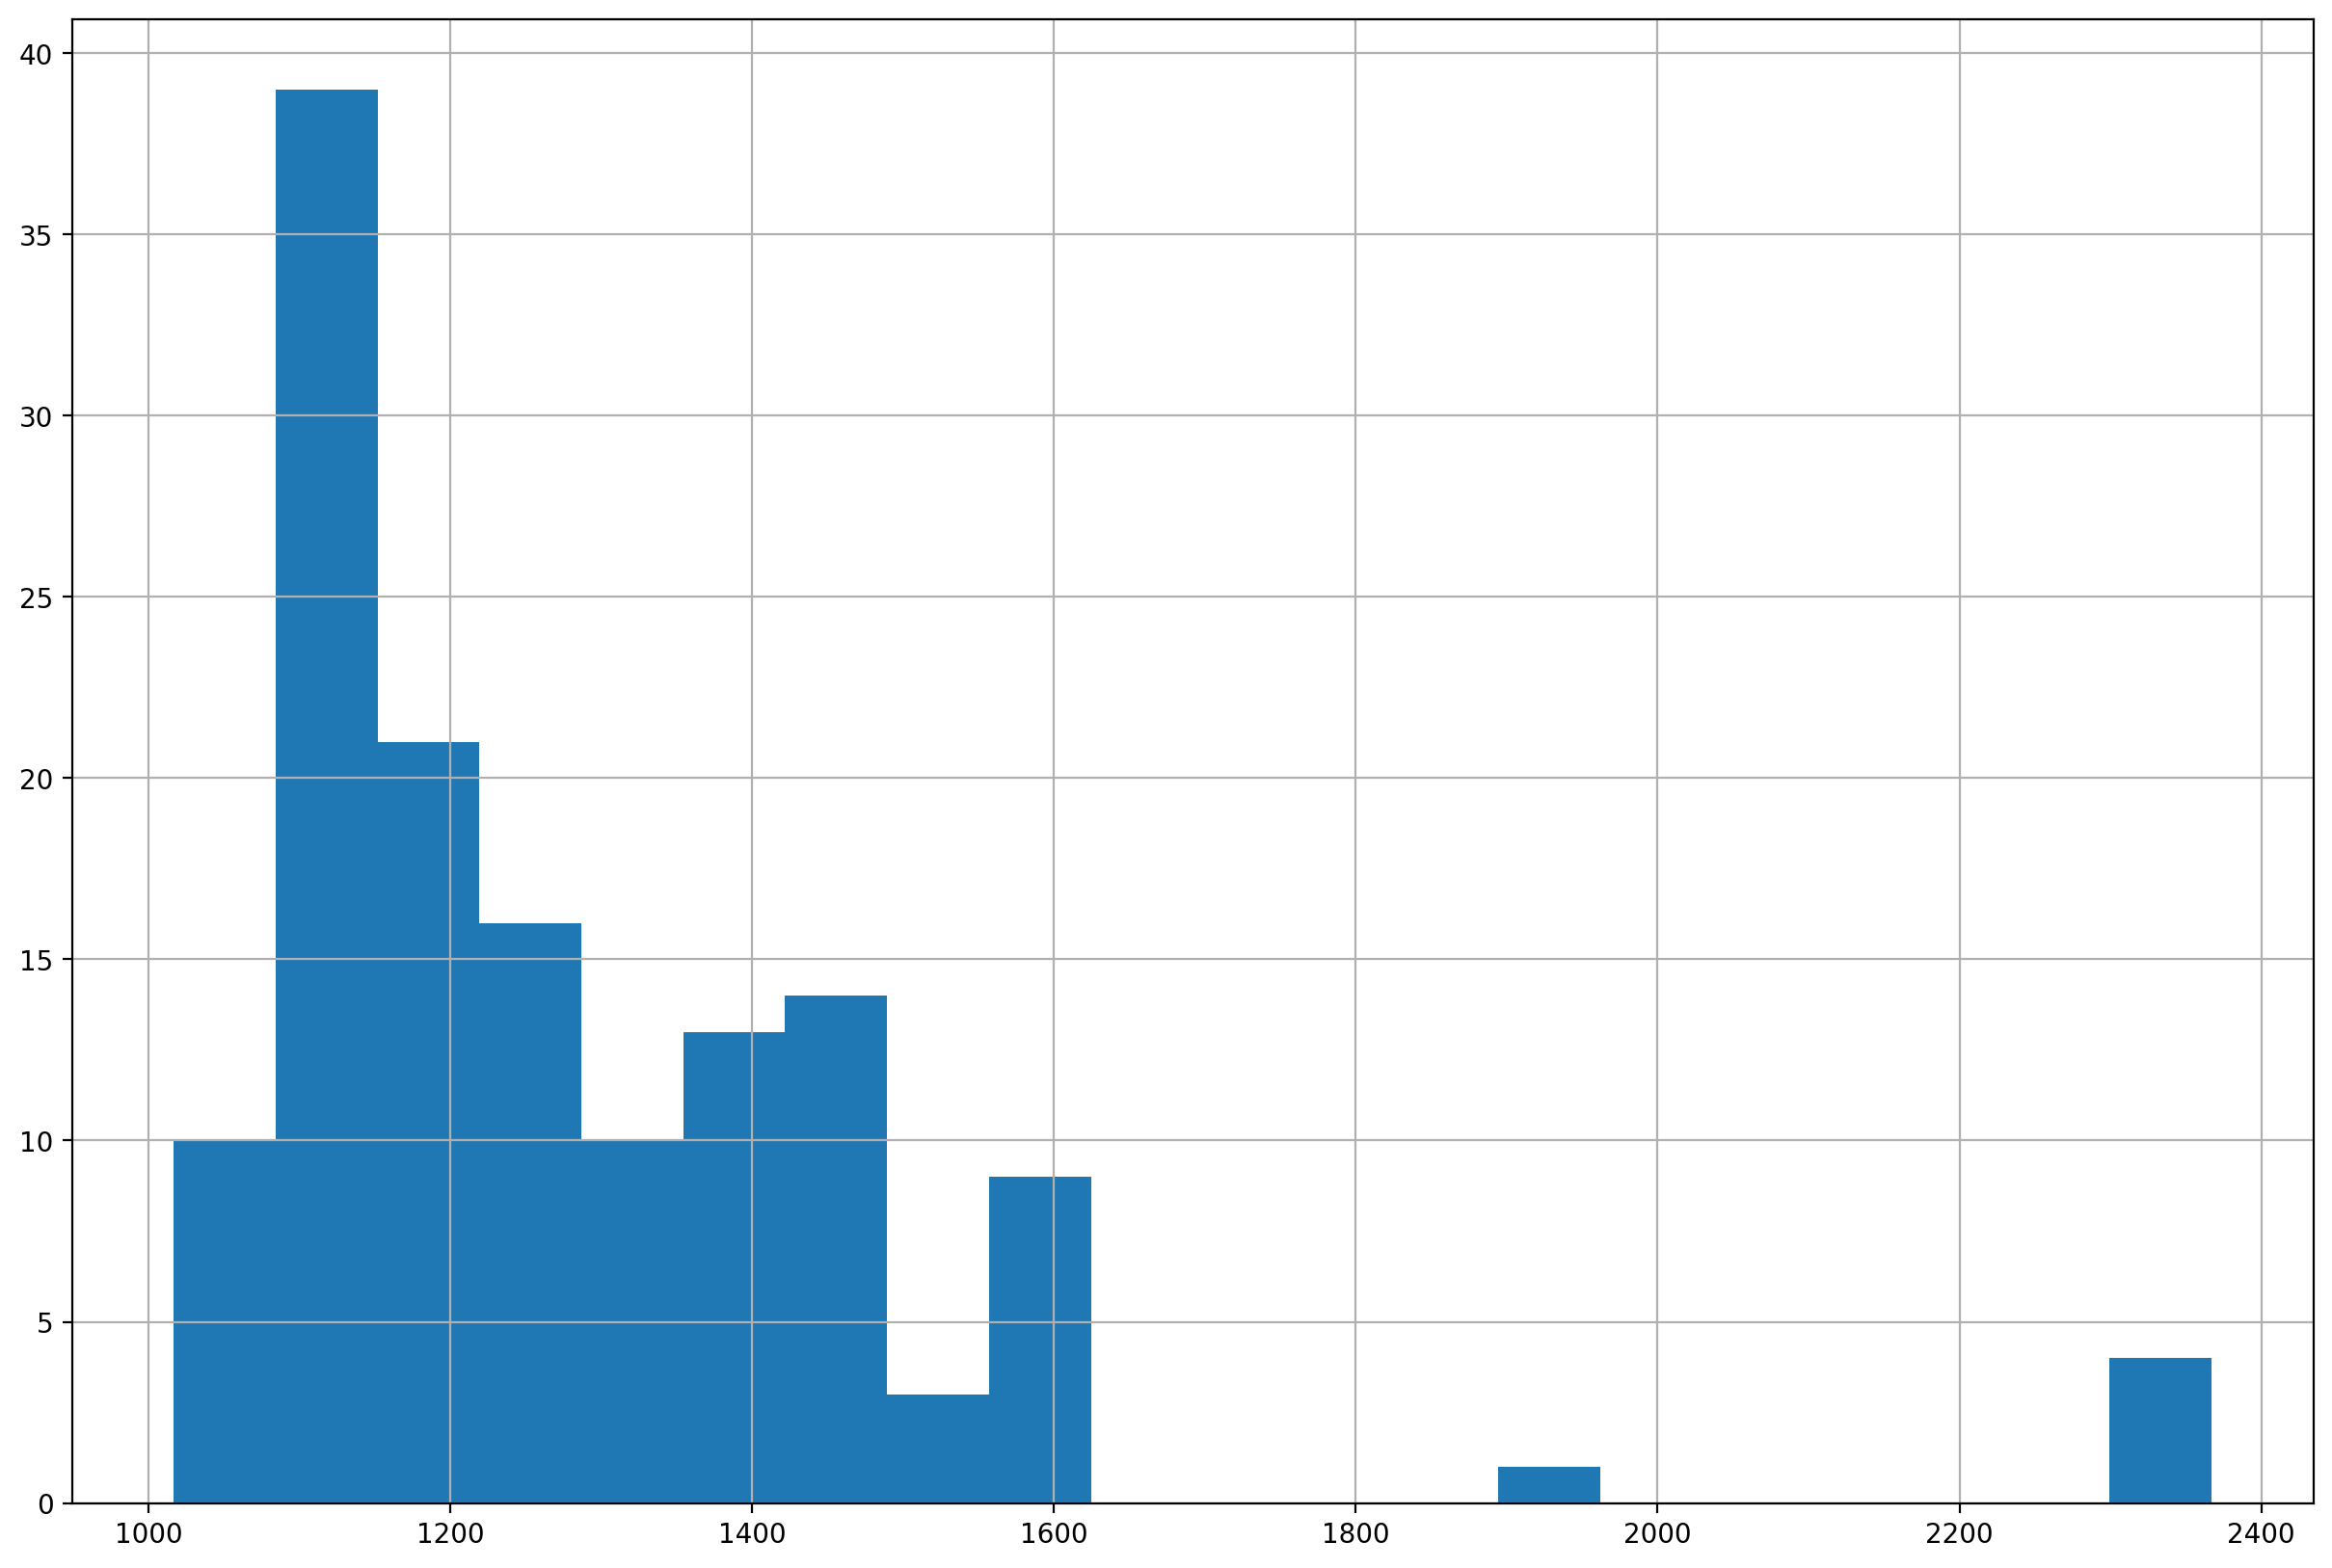

In [ ]:
selected_period[var].hist(bins = 20)